In [2]:
import matplotlib.pyplot as plt
from AaltoAtoms import CircCorralData, CircCorral
from AMRL import Createc_Controller
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os
import ipywidgets as wdg

succeed to connect
	17 centroids


<IPython.core.display.Javascript object>


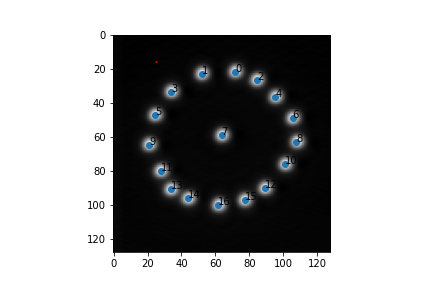

Textarea(value='[]', description='points:')

In [24]:
%matplotlib notebook

CC = Createc_Controller()

# f = r"Y:\labdata\Createc\STMDATA\Ag(111)\2022-03 Co Kondo corrals\04-04\A220405.101017.dat"
# C = CircCorralData(f, "label")
# C.occupied = True
# C.corral = True
# C.get_region_centroids()
# 

Cim = np.array(CC.stm.scandata(1,4))
zconst = float(CC.stm.getparam('ZPiezoConst'))
nmx = nmy = CC.get_len_nm()
C = CircCorral(Cim, zconst, nmx, nmy)
C.subtract_plane()
C.get_region_centroids(percentile=95, edge_cutoff=0.1, show=False)

# scale numbers between 0 and 1
im = MinMaxScaler().fit_transform(Cim.flatten().reshape(-1, 1)).reshape(Cim.shape)

# the image has to have 3 channels
# in this case we will just repeat the same channel 3 times
dispmat = np.stack([im,im,im], axis=-1)

fig = plt.figure()
plt.imshow(dispmat)

# show the atom positions
plt.scatter(*np.array(C.centroids).T)

# give numbers to the atom positions
for n, c in enumerate(C.centroids):
    plt.text(*c,'%d' %(n))

# List for selected pixels
selected = []

# Create a text area for displaying the selected pixels
text_area = wdg.Textarea(
    value = str(selected),
    description = "points:",
    disabled = False
)
display(text_area)

# Function to run when a pixel is clicked
def onclick(event):
    ''' Add the clicked pixel to the list of selected pixels and
    display it as red in the image.
    '''
    global selected
    x = int(event.xdata+0.5)
    y = int(event.ydata+0.5)
    if (y, x) in selected:
        im[y,x] = C.im[y,x]
        dispmat[y,x,:] = [im[y,x], im[y,x], im[y,x]]
        selected.remove((y, x))
    else:
        dispmat[y,x,:] = [1,0,0]
        selected += [(y, x)]
    text_area.value = str(selected)  # str(dir(event))
    print(selected)
    plt.imshow(dispmat)
    fig.canvas.draw()

ka = fig.canvas.mpl_connect('button_press_event', onclick)

In [4]:
C.__dict__

{'im': array([[-2.64952840e-03, -3.93581246e-03, -4.19570804e-03, ...,
         -4.24075036e-03, -3.40140858e-03, -2.74939245e-03],
        [-2.12877495e-03, -3.72856932e-03, -4.76118322e-03, ...,
         -3.53137039e-03, -3.05497206e-03, -2.41596466e-03],
        [-1.38947491e-03, -4.36689337e-03, -4.83492856e-03, ...,
         -3.35014469e-03, -2.95830308e-03, -2.44157771e-03],
        ...,
        [ 5.01532615e-03, -1.09832997e-04, -9.00484595e-04, ...,
          7.39103114e-04,  3.37412427e-04,  1.25480657e-03],
        [ 4.15585375e-03,  1.38527404e-03, -1.09149645e-04, ...,
          9.81773173e-05,  9.41421721e-04,  1.83930277e-03],
        [ 5.45192728e-03,  2.65923273e-03,  2.13420177e-05, ...,
          1.28888016e-03,  1.05240029e-03,  1.50668379e-03]]),
 'imshape': (103, 128),
 'xPix': 103,
 'yPix': 128,
 'ang_ppx_x': 0.1367611650485437,
 'ang_ppx_y': 0.11005000000000001,
 'file': None,
 'label': '2022-04-05 18:36:39.931353',
 'centroids': [[83.12, 10.76],
  [65.5, 11.0],


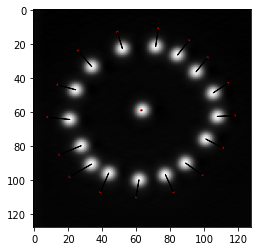

In [17]:
%matplotlib inline
assert(len(selected)==len(C.centroids))
for n, c in enumerate(C.centroids):
    plt.arrow(*c, *(np.array(list(reversed(selected[n])))-np.array(c)))
plt.imshow(dispmat);
plt.show()
#

In [ ]:
nm = nm + np.array([offset_nm[0] - len_nm[0]/2, offset_nm[1]])

In [ ]:
offset_nm = CC.get_xy_nm()

In [20]:
selected1 = selected 
centroids = C.centroids

In [ ]:
CC.stm.latmanip(*centroids[0], *np.array(selected1)[0])